In [17]:
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Import cleaned data
df=pd.read_csv('output/df_task1.csv')

In [19]:
# Filter dataframe to only contain between Q4 2019 and Q2 2020
df = df[(df['Year'] == 2019) & (df['Quarter'] == 4) |
        (df['Year'] == 2020) & (df['Quarter'] == 1) |
        (df['Year'] == 2020) & (df['Quarter'] == 2)].reset_index(drop=True)

In [20]:
# Save Quarter , we ll use it for visualization later
df_quarter=df['Quarter'].copy()
df.drop(['Quarter','code_sector','description_sector','Country'],axis=1,inplace=True)

In [21]:
# Fit a multiple linear regression model

# Add a constant term and combine the three x variables into one array
X = sm.add_constant(list(zip(df['Year'], df['sin_quarter'], df['cos_quarter'])))  
model = sm.OLS(df['Net profit/total assets'], X).fit()

# Get the coefficients and p-values
coefficients = model.params[1:] 
p_values = model.pvalues[1:]
# Predicted values from the model
predicted_values = model.predict(X)


In [22]:
df['Quarter']=df_quarter
df['Predicted Net profit/total assets']=predicted_values

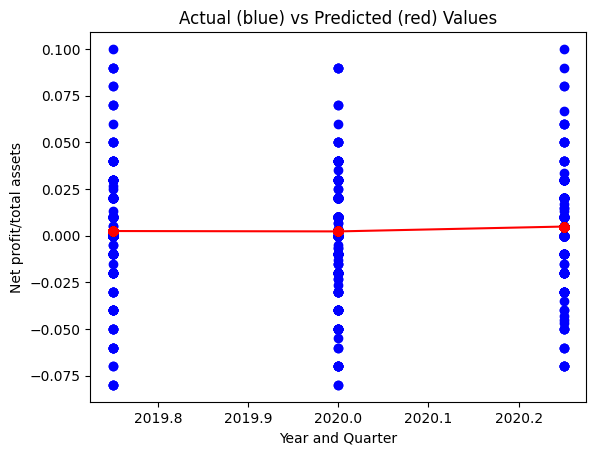

In [26]:
plt.scatter(df['Year'] + (df['Quarter'] - 1) / 4 ,
            df['Net profit/total assets'],
            color='blue', label='Actual')


# Scatter plot of Predicted Net profit/total assets (red)
plt.scatter(df['Year'] + (df['Quarter'] - 1) / 4  ,
            df['Predicted Net profit/total assets'],
            color='red', label='Predicted')

plt.xlabel('Year and Quarter')
plt.ylabel('Net profit/total assets')
plt.title('Actual (blue) vs Predicted (red) Values')

# Plot the predicted line (red)
plt.plot(df['Year'] + (df['Quarter'] - 1) / 4 , 
         df['Predicted Net profit/total assets'],
         color='red', linestyle='-', label='Predicted Line')

# Set formatter to suppress scientific notation on the x-axis
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()
plt.show()

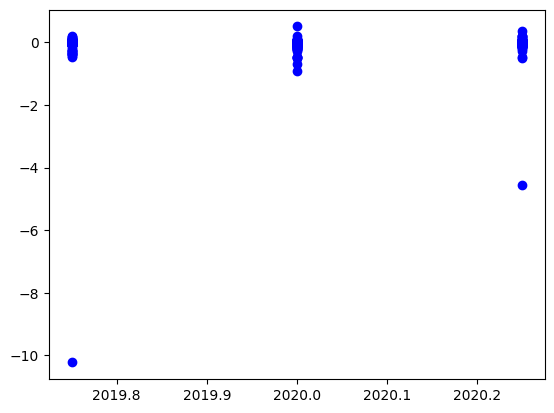

In [154]:
plt.scatter(df['Year'] + (df['Quarter'] - 1) / 4 ,
            df['Net profit/total assets'],
            color='blue', label='Actual')
# Set formatter to suppress scientific notation on the x-axis
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [155]:
df['Year'] + (df['Quarter'] - 1) / 4 

0       2019.75
1       2019.75
2       2019.75
3       2019.75
4       2019.75
         ...   
1048    2020.25
1049    2020.25
1050    2020.25
1051    2020.25
1052    2020.25
Length: 1053, dtype: float64

In [146]:
df['Year'] + (df['Quarter'] - 1) / 4 

0       2019.75
1       2019.75
2       2019.75
3       2019.75
4       2019.75
         ...   
1048    2020.25
1049    2020.25
1050    2020.25
1051    2020.25
1052    2020.25
Length: 1053, dtype: float64

In [123]:
predicted_values

array([-0.03371429, -0.03371429, -0.03371429, ..., -0.01538732,
       -0.01538732, -0.01538732])

In [112]:
p_values

x1    0.076490
x2    0.592497
x3    0.507927
dtype: float64